# Семинар: инструментарий на Python для решения научных и прикладных задач

## Инструментарий для  научной визуализации

### Построения графиков функций с библиотекой *Matplotlib*


In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Label
import seaborn as sns
sns.set()
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
A = 1
omega = 1


def f_sin(t, A, omega):
    ''' Определяет значение функции A*sin(omega*t),
        A, omega - параметры'''
    return (A*np.sin(omega*t))

In [3]:
print(f_sin.__doc__)

 Определяет значение функции A*sin(omega*t),
        A, omega - параметры


###  Массивы в numpy


In [4]:
# Массив чисел: линейная последовательность с 0 по 30 с шагом 2

x = np.arange(0, 30, 2)
print(x)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]


Еще один способ задания массива  [См. ссылку](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).
:
```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]
Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval [start, stop].

The endpoint of the interval can optionally be excluded.
```

In [5]:
x2 = np.linspace(0, 30, 20, endpoint=True)
print(x2)
print(x2.shape)

[ 0.          1.57894737  3.15789474  4.73684211  6.31578947  7.89473684
  9.47368421 11.05263158 12.63157895 14.21052632 15.78947368 17.36842105
 18.94736842 20.52631579 22.10526316 23.68421053 25.26315789 26.84210526
 28.42105263 30.        ]
(20,)


In [6]:
t = np.linspace(-4*np.pi, 4*np.pi, 150, endpoint=True)

In [7]:
print(t.shape)

(150,)


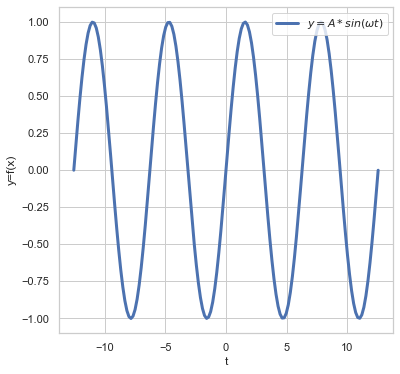

In [8]:
fig = plt.figure(figsize=(6, 6))
plt.plot(t, f_sin(t, A, omega), label='$y=A*sin(\\omega t )$', linewidth=3.0)
plt.xlabel('t', size=12)
plt.ylabel('y=f(x)', size=12)
plt.legend(loc='upper right')
plt.show()

### Интерактивное управление в Jupyter Notebooks:  библиотека *IPywidgets*
Для решения задач интерактивного управления параметрами воспользуемся библиотекой *IPywidgets* ([См. ссылку](https://ipywidgets.readthedocs.io/en/stable/index.html)). С помощью этой библиотеки  блокнот Jupyter превращается в диалоговую панель, удобную для визуализации и работы с данными (больше о возможностях, предоставляемых библиотекой, см статью [_Интерактивное управление в Jupyter Notebooks_](https://medium.com/nuances-of-programming/%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5-%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-jupyter-notebooks-4fd1fccb5788)).

Для работа с *IPywidgets*  создаем ячейку с :
```python
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Label
```

 Список доступных виджетов (*Widget List*) можно найти на [сайте библиотеки](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Widget-List). 
 
 Однако, в библиотеке есть удобная функция (*ipywidgets.interact*), котороя  автоматически создает элементы управления пользовательского интерфейса (UI) для интерактивного изучения кода и данных. Это самый простой способ начать использовать виджеты IPython.
  Мы воспользуемся конструкцией (декоратор):
  
```python
                                                                          
@interact 
```
которая автоматически создаёт  и текстовое поле и слайдер для выбора колонки и числа. Декоратор смотрит на введённые параметры и создаёт панель диалогового управления, основываясь на типах данных. 
[Пример](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Basic-interact)

In [9]:
%matplotlib widget 

In [10]:
@interact(t=1.0, A=1, omega=1)
def f_sin(t, A, omega):
    ''' Определяет значение функции A*sin(omega*t),
        A, omega - параметры'''
    return A*np.sin(omega*t)

interactive(children=(FloatSlider(value=1.0, description='t', max=3.0, min=-1.0), IntSlider(value=1, descripti…

#### Некоторые улучшения *Sliders*
Добавим для слайдеров интервалы и шаг изменения.
Пример:

In [11]:
@interact(x=(0.0, 20.0, 0.5))
def h(x=5.5):
    return x

interactive(children=(FloatSlider(value=5.5, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

Для нашей задачи определим функцию, с интерактивными всеми параметрами (амплитуда и частота):

In [12]:
@interact
def show_sin(A=1, omega=1):
    t = np.linspace(-4*np.pi, 4*np.pi, 150, endpoint=True)
    fig = plt.figure(figsize=(6, 6))
    plt.plot(t, f_sin(t, A, omega),
             label='$y=A*sin(\\omega_t )$', linewidth=3.0)
    plt.xlabel('t')
    plt.ylabel('y=f(x)')
    plt.legend(loc='upper right')
    plt.show()

interactive(children=(IntSlider(value=1, description='A', max=3, min=-1), IntSlider(value=1, description='omeg…

In [13]:
@interact
def show_sin(A=(1.0, 5.0, 1.0), omega=(0.1, 5.0, 0.1)):
    t = np.linspace(-4*np.pi, 4*np.pi, 150, endpoint=True)
    fig = plt.figure(figsize=(6, 6))
    plt.plot(t, f_sin(t, A, omega),
             label='$y=A*sin(\\omega_t )$', linewidth=3.0)
    plt.xlabel('t')
    plt.ylabel('y=f(x)')
    plt.legend(loc='upper right')
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='A', max=5.0, min=1.0, step=1.0), FloatSlider(value=2…

## Численное решение задачи Коши: библиотека SciPy

__Задача Коши:__ 
Рассмотрим решение начальной задачи (_Intial value problem_) для сисетемы обыкновенных дифференциальных уравнений первого порядка, разрешенных ошносительно производной:

$$
\begin{eqnarray}
\begin{cases}
     \frac{dy(t)}{dt} = f(t,y(t)),\\
     y|_{t=t_0} = y_0,
\end{cases}
\label{eq1}
\tag{1}
\end{eqnarray}
$$

где $ y=(y_1,...,y_n)^T $ - вектор-функция.



#### Пример 1: Численно решить задачу Коши:

$$
\begin{eqnarray}
\begin{cases}
    \frac{dy}{dt} = y\cos(t), \\
    y(0)=y_0.
\label{eq2}
\tag{2}
\end{cases}
\end{eqnarray}
$$

__Для сравнения приведем аналитическое решение задачи (2):__

$$
y_{exact} = y_0 e^{sin(t)}.
$$

Воспользуемся библиотекой SciPy, содержащей [функцию для решения начальной задачи](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html):
```python
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)[source]
Solve an initial value problem for a system of ODEs.
```
Для этого необходимо задать правые части уравнений (2).

In [14]:
%matplotlib inline 

from scipy.integrate import solve_ivp
from functools import partial

In [15]:
def F_right(t, y):
    ''' Определяет правую часть ДУ,
        примера 1'''
    return y*np.cos(t)

In [16]:
# Параметры численного счета
t0 = 0
tf = 10
nt = 1000
# Массив точек (сетка) в которых будет находится решение
t_e = np.linspace(t0, tf, nt)
# Начальное условие
y0 = np.array([3])

In [17]:
def y_exact(y0, t):
    ''' Определяет точное решение ДУ,
        примера 1'''
    return y0*np.exp(np.sin(t))

In [18]:
# Численное решение
sol_1 = solve_ivp(F_right, [t0, tf], y0, t_eval=t_e,
                  method='RK45', rtol=1e-8, atol=1e-8)

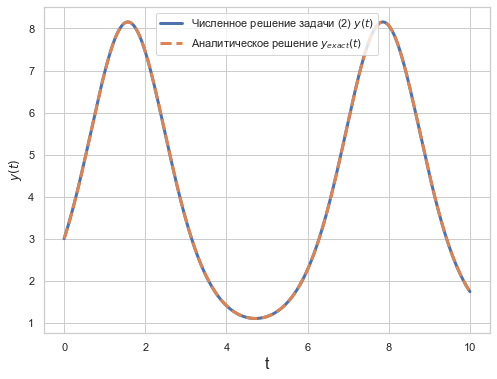

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(sol_1.t, sol_1.y[0], label='Численное решение задачи (2) $y(t)$',
         linewidth=3.0)
plt.plot(t_e, y_exact(y0, t_e), label='Аналитическое решение $y_{exact}(t)$',
         linestyle='--', linewidth=3.0)
plt.xlabel('t', size=16)
plt.ylabel('$y(t)$', size=12)
plt.legend(loc='upper center', fontsize=11)
plt.show()

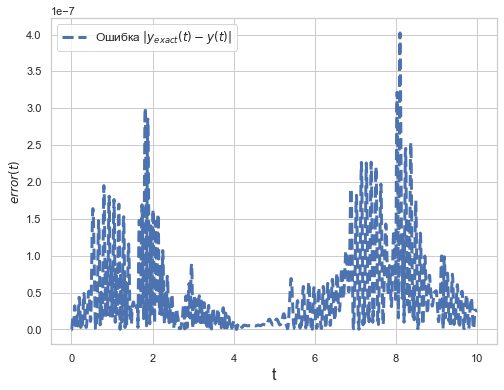

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(t_e, np.abs(y_exact(y0, t_e)-sol_1.y[0]),
         label='Ошибка $|y_{exact}(t) - y(t)|$', linestyle='--', linewidth=3.0)
plt.xlabel('t', size=16)
plt.ylabel('$error(t)$', size=12)
plt.legend(fontsize=12)
plt.show()

#### Пример 2: Численно решить задачу Коши:

$$
\begin{eqnarray}
\begin{cases}
    \frac{dy}{dt} = y\cos(\omega t), \\
    y(0)=y_0.
\end{cases}
\label{eq3}
\tag{3}
\end{eqnarray}
$$

__Для сравнения приведем аналитическое решение задачи (3):__

$$
y_{exact} = y_0 e^{\frac{1}{\omega}sin(\omega t)}.
$$

__Отметим, что в модель входит параметр $\omega$. Для корректной передачи параметра в функцию SciPy воспользуемся методом:__
```python
from functools import partial
```
[Модуль _functools_](https://docs.python.org/3/library/functools.html) предназначен для функций высшего порядка: функций, которые воздействуют на другие функции или возвращают их.
Для решения задачи:
* Зададим  правые части уравнений (3);
* "Обернем" вызов решателя с помощью функции _partial_,  для частичного применения функции, которое «замораживает» некоторую часть аргументов функции и/или ключевых слов.

In [21]:
def F_right2(t, y, omega):
    ''' Определяет правую часть ДУ примера 2
    omega - параметр'''
    return y*np.cos(omega*t)

In [22]:
# Параметр модели
omega = np.pi/2
# Параметры численного счета
t0 = 0
tf = 10
nt = 1000
# Массив точек (сетка) в которых будет находится решение
t_e = np.linspace(t0, tf, nt)
# Начальное условие
y0 = np.array([3])

In [23]:
f = partial(F_right2, omega=omega)
t_e = np.linspace(t0, tf, nt)
sol_2 = solve_ivp(f, [t0, tf], y0, t_eval=t_e, method='RK45',
                  rtol=1e-8, atol=1e-8)

In [24]:
def y_exact2(y0, t, omega):
    ''' Определяет точное решение ДУ,
        примера 2'''
    return y0*np.exp(np.sin(omega*t)/omega)

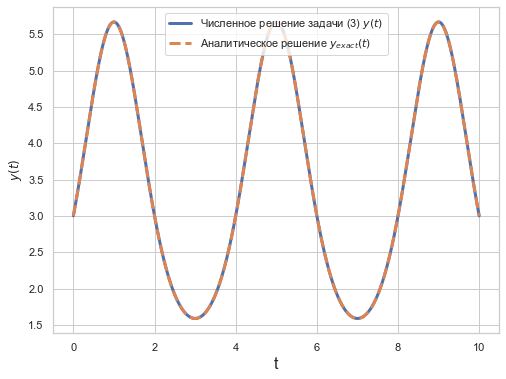

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(sol_2.t, sol_2.y[0], label='Численное решение задачи (3) $y(t)$',
         linewidth=3.0)
plt.plot(t_e, y_exact2(y0, t_e, omega),
         label='Аналитическое решение $y_{exact}(t) $',
         linestyle='--', linewidth=3.0)
plt.xlabel('t', size=16)
plt.ylabel('$y(t)$', size=12)
plt.legend(loc='upper center', fontsize=11)
plt.show()

### Задача 1: Линеаризованное уравнение на магнитный момент 

В лекции был рассмотрен частный случай, когда уравнение на магнитный момент Ландау–Лифшица–Гильберта может быть сведено к решению уравнения на одну компоненту $m_y$ (линейный осциллятор).

$$
\begin{eqnarray}
 \frac{d^2 m_y}{dt^2} + 2\alpha \omega_J \frac{d m_y}{dt} +\omega_F^2 m_y = \omega_F^2 G r \sin(\omega_J t)
\label{eq4}
\tag{4}
\end{eqnarray}
$$

с параметрами модели:
* G - отношение энергии Джозефсона к энергии магнитной анизотропии;
* r - константа спин-орбитального взаимодействия;
* $\alpha$ - диссипация Гилберта;
* $\omega_F$ - частота ферромагнитного резонанса.



Для проведения исследования динамики перейдем от одного дифференциального уравнения второго порядка к системе двух уравнений и разрешим их относительно производных, полагая $ m_y = y_1$: 

$$
\begin{eqnarray}
\begin{cases}
   \frac{d y_1}{dt} = y_2, \\
    \frac{d y_2}{dt} =  - 2\alpha \omega_J y_2 -\omega_F^2 y_1 + \omega_F^2 G r \sin(\omega_J t).
\end{cases}
\label{eq5}
\tag{5}
\end{eqnarray}
$$

Начальные условия:

$$
\begin{eqnarray}
 y_1(0)=0.1, y_2(0)=0.
\tag{6}
\end{eqnarray}
$$

__Опредляем значения параметров модели и численного решения__

In [26]:
# Параметры модели
G = 0.1
r = 0.1
omegaF = 0.5
alpha = 0.1
omegaJ = 1
# Параметры численного счета
t0 = 0
tf = 100
nt = 1000
# Массив точек (сетка) в которых будет находится решение
t_e = np.linspace(t0, tf, nt)
# Начальное условие
y0 = np.array([0.01, 0])

In [27]:
def my_t(t, S, G, r, alpha, omegaF, omegaJ):
    ''' Определяет правые части ДУ Задачи 1.
    G, r, alpha, omegaF,omegaJ - параметры модели
    S=[y1, y2] - вектор-фунция'''
    y1 = S[0]
    y2 = S[1]
    dy1 = y2
    dy2 = -2*alpha*omegaF*y2 - omegaF*omegaF*y1 + \
        omegaF*omegaF*G*r*np.sin(omegaJ*t)
    dS = [dy1, dy2]
    return dS

In [28]:
s = np.array([0.1, 0])
dS = my_t(0, s,  0.1, 0.1, 0.1, 0.5, 1)

dS

[0.0, -0.025]

In [29]:
f = partial(my_t, G=G, r=r, alpha=alpha,
            omegaF=omegaF, omegaJ=omegaJ)
t_e = np.linspace(t0, tf, nt)
s0 = np.array([0.0, 0])
sol_lin = solve_ivp(f, [t0, tf], s0, t_eval=t_e, method='RK45')

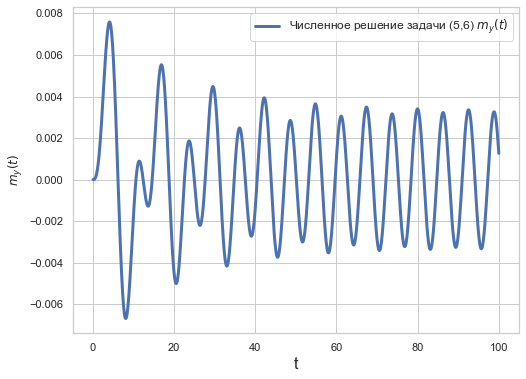

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(sol_lin.t, sol_lin.y[0],
         label='Численное решение задачи (5,6) $m_y(t)$', linewidth=3.0)
plt.xlabel('t', size=16)
plt.ylabel('$m_y(t)$', size=12)
plt.legend(fontsize=12)
plt.show()

## Задача 2.  Периодичность появления интервалов переворота намагниченности в  $ϕ_0$ джозефсоновском переходе под воздействием импульса тока
### Python-realization 
Рассмотрим _Python_- реализацию программного кода, на основе которого получены результаты в статье:
 
[1] _P. Kh. Atanasovaa, S.A. Panayotovaa,I.R. Rahmonovc, Yu. M. Shukrinovc, E.V. Zemlyanayac, and M. V. Bashashin_. __Periodicity in the Appearance of Intervals of the Reversal
of the Magnetic Moment of a $ϕ_0$ Josephson Junction.__ , JETP Letters, __2019__, Vol. 110, No. 11, pp. 722–726

***
#### Схема перехода $ϕ_0$: 

![fig1-SFS2.png](https://disk.jinr.ru/index.php/apps/files_sharing/publicpreview/wBpNftN4cp4L9d3?x=2474&y=958&a=true&file=SFS.png&scalingup=0)


* (S) сверхпроводящие слои 
* (F) ферромагнитный слой
* (M) магнитный момент ферромагнитного слоя, ось которого направлена вдоль оси $z$. 

### Математическая постановка задачи

Основные уравнение представлены в работе [1]. Ниже приведена задача Коши для системы уравнений в безразмерном виде.
Динамика магнитного момента $M$ рассматриваемой системы описывается уравнением Ландау–Лифшица–Гильберта:

$$
\begin{eqnarray}
&& \frac{dm_x}{dt}=-\frac{1}{1+M^2\alpha^2} \left\{ m_y H_z -m_z H_y +\alpha [m_x  (M,H) - H_x] \right\},\\
&& \frac{dm_y}{dt}=-\frac{1}{1+M^2\alpha^2} \left\{ m_z H_x -m_x H_z +\alpha [m_y  (M,H) - H_y] \right\},\\
&& \frac{dm_z}{dt}=-\frac{1}{1+M^2\alpha^2} \left\{ m_x H_y -m_y H_x +\alpha [m_z  (M,H) - H_z] \right\},
\label{eq7}
\tag{7}
\end{eqnarray}
$$

где $ M=[m_x, m_y, m_z] $ -компоненты магнитного момента. 

Компоненты эффективного поля $H=[H_x,H_y,H_z]$ зависит от джозефсоновской разности фаз $\phi $  определются следующим образом:

$$
\begin{eqnarray}
&& H_x (t)=0,\\
&& H_y = G r \sin( \phi(t)-r m_y(t) ),\\
&& H_z (t)= m_z(t),
\end{eqnarray}
$$

при этом уравнение на джозефсоновскую разность фаз $\phi (t)$ определяется из уранения на электрический ток $I$ определяется через джозефсоновский контакт, измеренный в единицах критического тока $I_c$:

$$
 I= w \left( \frac{d\phi}{dt} - r \frac{dm_y}{dt}\right) +\sin(\phi- r m_y),
$$

а именно:

$$
\begin{eqnarray}
\frac{d\phi}{dt}= -\frac{1}{w}\left( \sin(\phi- r m_y) + r \frac{dm_y}{dt} \right)+\frac{1}{w} I, 
\label{eq8}
\tag{8}
\end{eqnarray}
$$

с параметрами модели:
* G - отношение энергии Джозефсона к энергии магнитной анизотропии;
* r - константа спин-орбитального взаимодействия;
* $\alpha$ - диссипация Гилберта;
* $\omega_F$ - частота ферромагнитного резонанса;(не входит в уравнения!)

### Начальные условия
Начальные условия предполагают, что все компонентны магнитного момента, кроме $m_z$, равны нулю:

$$
\begin{eqnarray}
m_x(0)=0, m_y(0)=0, m_z(0)=1, \phi(0) =0.
\label{eq9}
\tag{9}
\end{eqnarray}
$$

### Вид тока

Ток $I$ в уравнении (8) представляется в виде прямоугольного импульса:

$$
\begin{eqnarray}
I = I(t) = 
\begin{cases}
   A_s, & t \in \left[ t_s - \Delta t / 2, t_s + \Delta t / 2 \right], \\
   0, & otherwise.
\end{cases}
\end{eqnarray}
$$

* с амплитудой $A_s$, 
* локализацией $t_s$,
* длительностью $\Delta t$.

__Определим функцию импулься тока и построим ее график__

In [31]:
def I_pulse(t, As, t_s, delta_t):
    ''' Определяет пимпульс тока. Параметры
    As - амплитуда,
    t_s -локализация
    delta_t -длительность'''
    Ipuls = 0
    if t_s-1/2*delta_t <= t <= t_s+1/2*delta_t:
        Ipuls = As
    return Ipuls

__Параметры импульса тока и численного решения__

In [32]:
As = 1.5
t_s = 25
delta_t = 6
# Параметры численного счета
t0 = 0
tf = 100
nt = 1000
# Массивы точек, в которых находим значения тока
y_I = np.zeros([nt])
t_e = np.linspace(t0, tf, nt)
for i in range(nt):
    y_I[i] = I_pulse(t_e[i], As, t_s, delta_t)

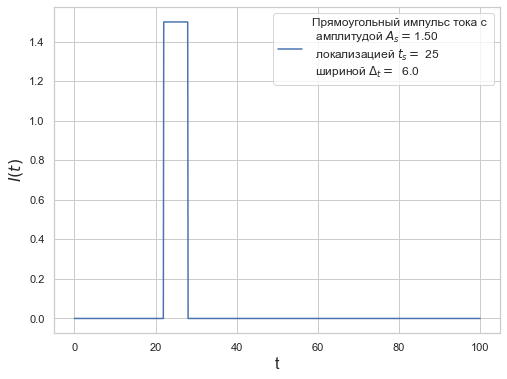

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(t_e, y_I, label='Прямоугольный импульс тока с ' +
         '\n амплитудой $A_s = $%4.2f' % As +
         '\n локализацией $t_s = $ %i' % t_s +
         '\n шириной $\Delta_t =$ %4.1f' % delta_t)
plt.xlabel('t', size=16)
plt.ylabel('$I(t)$', size=16)
plt.legend(fontsize=12)
plt.show()

### Определим  правые части уравнений

In [34]:
def my_sfs(t, S,  G, r,  alpha, As, t_s, delta_t):
    ''' Определяет правые части ДУ Задачи 2.
    G, r, alpha, omegaF,omegaJ - параметры модели
    As, t_s, delta_t - параметры импульма тока
    S=[mx, my, mz, phi] - искомая вектор-фунция'''
    w = 1
    mx = S[0]
    my = S[1]
    mz = S[2]
    ph = S[3]
    Hx = 0
    Hy = G*r*np.sin(ph-r*my)
    Hz = mz
    H = [Hx, Hy, Hz]
    M = [mx, my, mz]
    m2 = np.dot(M, M)
    HdM = np.dot(H, M)
    alpha2 = -1/(1+alpha*alpha*m2)
    Iv = I_pulse(t, As, t_s, delta_t)
    dmx = alpha2 * ((my*Hz-mz*Hy) + alpha * (mx*HdM-Hx))
    dmy = alpha2 * ((mz*Hx-mx*Hz) + alpha * (my*HdM-Hy))
    dmz = alpha2 * ((mx*Hy-my*Hx) + alpha * (mz*HdM-Hz))
    dph = r * dmy - 1/w * np.sin(ph-r*my) + Iv/w
    dS = [dmx, dmy, dmz, dph]
    return dS

__Проверяем на правильность__

In [35]:
s = np.array([0, 0, 1, 0])
dS = my_sfs(0, s, 0.1, 0.1, 0.1, 1.5, 25, 5)
dS

[-0.0, -0.0, -0.0, 0.0]

### Определим параметры модели

In [36]:
G = 18
r = 0.1
alpha = 0.1
As = 1.5
t_s = 25
delta_t = 6
t0 = 0
tf = 200

__Находим численное решение с использованием библиотекой Scipy__

In [37]:
# Параметры численного счета
t0 = 0
tf = 100
nt = 1000

In [38]:
f = partial(my_sfs, G=G, r=r, alpha=alpha,
            As=As, t_s=t_s, delta_t=delta_t)
t_e = np.linspace(t0, tf, nt)
s0 = np.array([0, 0, 1, 0])
sol_1 = solve_ivp(f, [t0, tf], s0, t_eval=t_e,
                  method='BDF', rtol=1e-8, atol=1e-8)

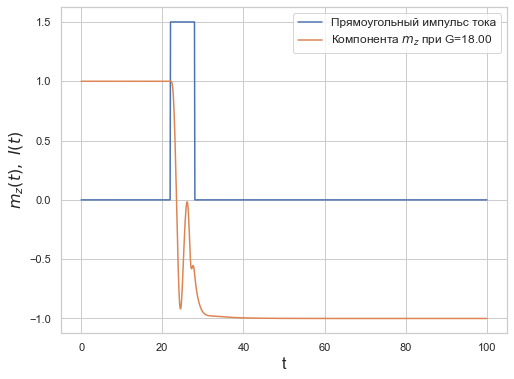

In [39]:
%matplotlib inline 
plt.figure(figsize = (8, 6))
plt.plot(t_e,y_I,  label= 'Прямоугольный импульс тока')
plt.plot(sol_1.t, sol_1.y[2], label= 'Компонента $m_z $ при G=%4.2f' %G)
plt.xlabel('t', size=16)
plt.ylabel('$m_z(t),~I(t)$', size=16)
plt.legend(fontsize=12)
plt.show()

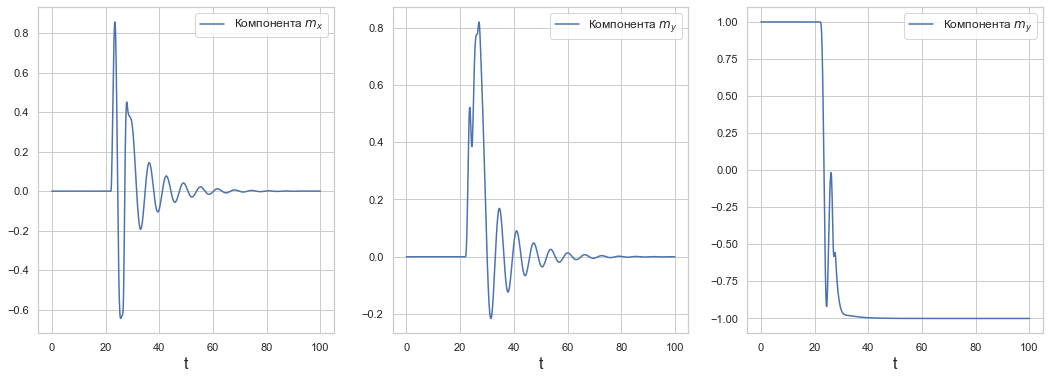

In [40]:
# Вывод графиков
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(sol_1.t, sol_1.y[0], label='Компонента $m_x $')
plt.xlabel('t', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 2)
plt.plot(sol_1.t, sol_1.y[1], label='Компонента $m_y $')
plt.xlabel('t', size=16)
plt.legend(fontsize=12)
plt.subplot(1, 3, 3)
plt.plot(sol_1.t, sol_1.y[2], label='Компонента $m_y $')
plt.xlabel('t', size=16)
plt.legend(fontsize=12)
plt.show()

__Проверка условия $|m|=1$__

In [41]:
M_1 = 1 - np.sqrt(sol_1.y[0]**2 + sol_1.y[1]**2 + sol_1.y[2]**2)

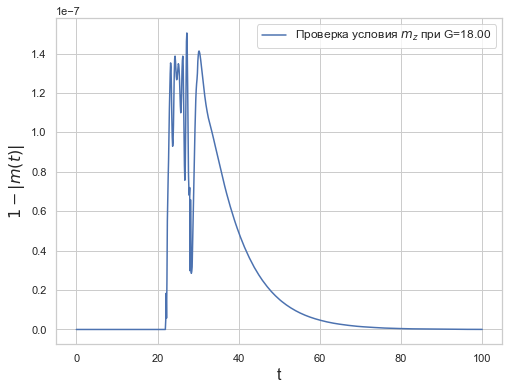

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(sol_1.t, M_1, label='Проверка условия $m_z $ при G=%4.2f' % G)
plt.xlabel('t', size=16)
plt.ylabel('$1-|m(t)|$', size=16)
plt.legend(fontsize=12)
plt.show()

## Расчеты при различных значениях параметров

Для анализа возможности обращения магнитного момента джозефсоновского перехода ϕ0 при различных зачениях параметров, проведем расчеты для _G_=8,9.

In [45]:
G = 8
f = partial(my_sfs, G=G, r=r, alpha=alpha,
            As=As, t_s=t_s, delta_t=delta_t)
t_e = np.linspace(t0, tf, nt)
s0 = np.array([0, 0, 1, 0])
sol_1 = solve_ivp(f, [t0, tf], s0, t_eval=t_e,
                  method='BDF', rtol=1e-8, atol=1e-8)

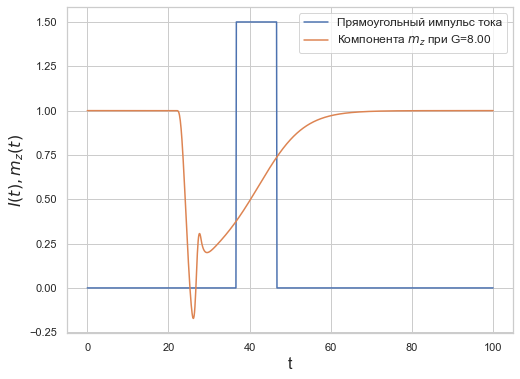

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(t_e, y_I, label='Прямоугольный импульс тока')
plt.plot(sol_1.t, sol_1.y[2], label='Компонента $m_z $ при G=%4.2f' % G)
plt.xlabel('t', size=16)
plt.ylabel('$I(t), m_z(t)$', size=16)
plt.legend(fontsize=12)
plt.show()

### Проведение расчетов при различных знечениях параметров: плоскость $(\alpha, G)$

In [47]:
# количество точек по каждому параметру при значении которых проводим расчеты
N = 10
G0 = 1
delta_G = 1
alpha0 = 0.1
delta_alpha = 0.01

In [48]:
alpG = np.zeros((N, N, 1)) + 1
alpG[1, 1, 0]

1.0

In [49]:
alpG.shape

(10, 10, 1)

In [50]:
# Параметры численного счета
t0 = 0
tf = 100
nt = 1000

In [51]:
%%time
for j in range(N):
    for i in range(N):

        G = G0 + delta_G*i
        alpha = alpha0+delta_alpha*j
        f = partial(my_sfs, G=G, r=r, alpha=alpha, \
                As=As, t_s=t_s, delta_t=delta_t)
        t_e = np.linspace(t0, tf, nt)
        s0 = np.array([0, 0, 1, 0])
        
        sol_i = solve_ivp(f, [t0, tf], s0, t_eval=t_e, method='BDF', rtol=1e-8, atol=1e-8) 
        if sol_i.y[2][nt-1] < 0:
            alpG[i, j, 0] =- 1


Wall time: 45.6 s


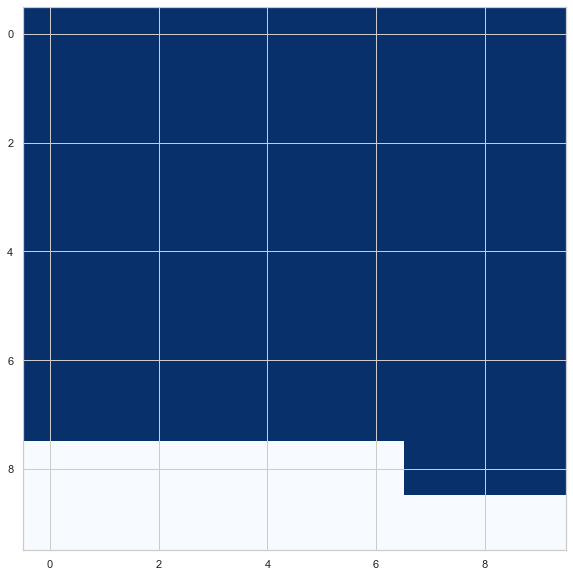

In [52]:
Z1 = alpG.reshape(N, N)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(Z1, cmap='Blues')

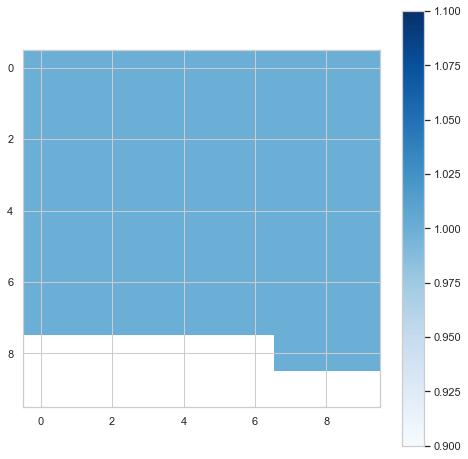

In [53]:
fig, ax1 = plt.subplots(figsize=(8, 8))
# mask out the negative and positve values, respectively
Zpos = np.ma.masked_less(alpG[:, :, 0], 0)
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')
fig.colorbar(pos, ax=ax1)
plt.show()

__Требуется параллелизация: можно провести расчеты для каждого набора параметров независимо__

## Параллельная реализация

In [54]:
import multiprocessing as mp
import time

In [55]:
print(f"Number of cpu: {mp.cpu_count()}")

Number of cpu: 8


In [56]:
n_cpu = mp.cpu_count()
n_cpu

8

### Пример использования библиотеки Joblib 

In [57]:
from joblib import Parallel, delayed
import numpy as np


def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

In [60]:
time_s = time.time()
results = Parallel(n_jobs=1)(delayed(random_square)(i) for i in range(10000))
time_f = time.time()
print(f'Execution time {time_f - time_s} s')

Execution time 0.6758818626403809 s


In [61]:
time_s = time.time()
results = Parallel(n_jobs=4)(delayed(random_square)(i) for i in range(10000))
time_f = time.time()
print(f'Execution time {time_f - time_s} s')

Execution time 0.31682753562927246 s


### Нахождение решений задачи при различных значениях параметров в параллельном режиме

In [62]:
N = 10
G0 = 1
delta_G = 1
alpha0 = 0.1
delta_alpha = 0.01

In [63]:
alpG = np.zeros((N, N, 1)) + 1
alpG[1, 1, 0]

1.0

In [64]:
# Параметры численного счета
t0 = 0.0
tf = 100.0
nt = 1000

In [65]:
def funk_parall(k):
    i = k % N
    j = k // N
    mz_sol = 1
    G = G0 + delta_G*i
    alpha = alpha0 + delta_alpha*j

    f = partial(my_sfs, G=G, r=r, alpha=alpha,
                As=As, t_s=t_s, delta_t=delta_t)

    s0 = np.array([0, 0, 1, 0])
    t_e = np.linspace(t0, tf, nt)
    sol_i = solve_ivp(f, [t0, tf], s0, t_eval=t_e,
                      method='BDF', rtol=1e-8, atol=1e-8)

    if sol_i.y[2][nt-1] < 0:
        mz_sol = -1

    return mz_sol

In [66]:
time_s = time.time()
rez = Parallel(n_jobs=1)(delayed(funk_parall)(k) for k in range(N * N))
time_f = time.time()
print(f'Execution time {time_f - time_s} s')

Execution time 49.51228713989258 s


In [67]:
time_s = time.time()
rez = Parallel(n_jobs=4)(delayed(funk_parall)(k) for k in range(N*N))
time_f = time.time()
print(f'Execution time {time_f - time_s} s')

Execution time 15.15783977508545 s


In [68]:
alpGxy = np.zeros((N*N, 3)) + 1
alpGxy.shape

(100, 3)

In [69]:
for j in range(N):
    for i in range(N):
        G = G0+delta_G*i
        alpha = alpha0+delta_alpha*j
        alpGxy[i+j*N, 0] = G
        alpGxy[i+j*N, 1] = alpha

In [70]:
alpGxy[:, 2] = rez

In [71]:
X = alpGxy[:, 0]
Y = alpGxy[:, 1]
Z = alpGxy[:, 2]
Zc = (Z+1)/2

In [72]:
Z1 = Zc.reshape(N, N)

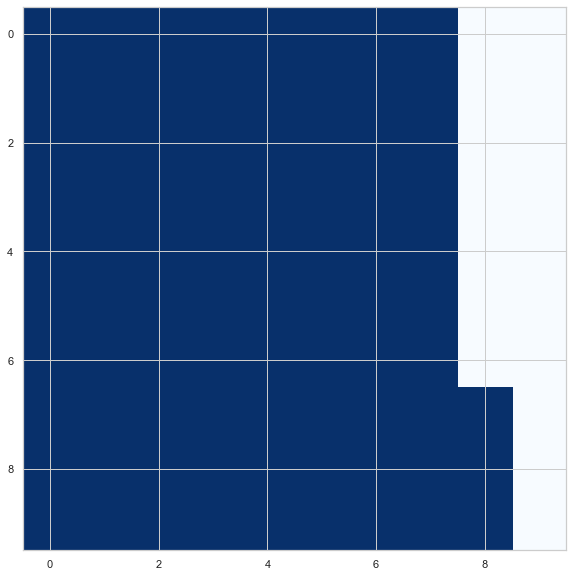

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(Z1, cmap='Blues')